<a href="https://colab.research.google.com/github/FedeleDelvecchio/MLPNS/blob/main/Class/Lez20_28042021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are gonna look specific design of neural network. That makes specific things like the **autoencoders**. 

Then we wiil see currrent neural network. which is another architecture for time series.

We saw multilayer perceptron and backpropagation. 

NN are also known as multilayer perceptron. 

Different activation function gives different output, because of the shape of activation function. We choose activation function based on the task we want to do (regression task, classifier, probabilistic classifier, ... ).

The basic architecture is a bunch of multilinear regressions, that happen in parallel that happen in series. 

To get rid of the "curse of dimensionality", we do back-propagation of the prediction error, since the NN works in series. Each neuron is adjusted by something proportional to the derivative of the error. 



###**TODAY - HANDWRITTEN DIGITS DATASET**

**Slide**: https://slides.com/federicabianco/mlpns9 

**Notebook**: https://github.com/fedhere/MLPNS2021/blob/main/NNDL/April2021_autoencode_digits.ipynb



We saw output layaer, hidden layer and the concept of fully connected (dense layer), sparsely connected. 

Sparsely connected: some of the input don't go to all the next layer. Some layer ouput don't go to all next layer.


We have the "freedom of the output side of each layer " but the input shape is determined by the sahpe of other matrix.

We have also the activatoin functino. The purpose is to minimize an error, means that I have to think what is the right way to look for the minimum value of my L_1. We will see how to do, today:

- waht is the input data (binary continuos)

- what is the task we will do (regression, classification)

See this book about neural network:
http://neuralnetworksanddeeplearning.com/chap4.html 


##**HYPERPARAMETER**

- Number of hidden layer, is the first to think about. 
- Loss function (L_1, L_2, ...)
- Activation function (consistent with loss function)
- Number of epochs, to prevent overfitting
- learning rate (balance speed and accuracy. It's like "how large the step was in the MCMC". With very little step I am not gonna learn, with large step I have less accuracy.)
- batch size: how many input neuron I use in that training epochs. Smaller batch size is faster but leads to overtraining.

A wide neural network will have the tendency to overfint. On the other hand, a deep neural network has an high computational costs and time to train.



For the regression task I can choose a mean_squared_error loss function.

The binary classificiation is used with the loss_binary_crossentropy loss function. 

And other (see slide).

###**Whenever I run NN, I have to see the loss function, to see how I am learning and if I am overfitting.**

####When at the first few epoch I am learning very slow, I will change the learning rate to adjust this problem.

We also have a table in the slide to choose the right loss function.


#Convolutoinal neural network (tha we built with keras) are suitable to do task where my dataset have correlation structure: such images!

#**Today we will do a dense autoencoder: it is a neural network with a bottleneck. Generally the goal is tho approximate a complex function with simple discrete choice with a series of linear function.** This NN is use also to du dimesnionality reduction. 

The input data is compressed, and then the NN is expanding again after the the bottleneck. 
The NN learn how to complress the data and then I can reconstruct the image by what I learned. In this way I can reconstruct other similar image, for example. If I do a good job by compression, I can reconstruct better the image. 



##When I use image to do dense DNN with keras, I have to shrink the image into a 1D array because I am using a type of NN that is sequential NN.

## model.compile(...)

To change the learning rate, the syntax is:

keras.optimizers.Adam(lr=0.01) this is what I pass to the optimizer in the model.compile function:

model.compile(optimizer = keras.optimizers.Adam(lr=0.01)… 

####**So in this model.compile I pass the scheme to go downhill the lilelihood surface (optimizer=Adam) and the learning rate.**


#**With this NN we want to recreate an handwritten digits: used for image reconstruction**

If we have a mean squared error loss function the task we can do is a regression. This is not the best choice I can do for handwritten digit recontruction.

If I want to do binary classficiation I have to use other loss function because I am trying to predict 0 or 1, I am classfying. 

###**Image reconstruction doesn't work so good with regression with a mean square error loss. It works better with a sigmoid loss function. But if we do a binary classficiation, instead of regression we obtein a better result at all.**


Notebook: https://github.com/fedhere/MLPNS2021/blob/main/NNDL/April2021_autoencode_digits.ipynb



#START EXERCISE

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense#, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import glob
import pylab as pl
from PIL import Image

%pylab inline

Populating the interactive namespace from numpy and matplotlib


(60000, 28, 28)

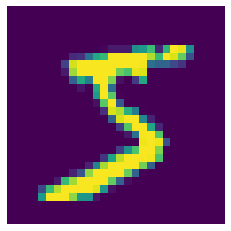

In [2]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

img_rows, img_cols = 28, 28
pl.imshow(x_train[0])
pl.axis('off')
intialshape = x_train[0].shape
ndim = np.prod(x_train[0].shape)
x_train.shape

In [3]:
intialshape

(28, 28)

In [4]:
x_train[0].shape

(28, 28)

In [5]:
np.prod(x_train[0].shape) #28x28=784

784

**La cella seguente è la cella della normalizzazione. Dobbiamo assicurarci che la shape giusta (ovvero un vettore unidimensionale) per applicare il modello e soprattutto che sia normalizzata con valori tra 0 e 1.**

Siccome x_train contiene numeri da 0 a 255 di tipo uint8. Per utilizzarlo nel modello devo fare il reshape del mio train set (trasformandolo in un vettore unidimensionale) e inoltre devo normalizzarlo.

Quindi per normalizzarlo trasformo tutti i numeri in float e li divido per 255 così saranno tutti tra 0 e 1 (x_train.astype(float) / 255). Poi faccio il reshape e la shape del vettore x_train la faccio diventare di 784, ovvero il numero di dimensioni dell'immagine (in altre parole l'immagine è di 28x28=784 pixel. Allora creo un vettore lungo 784 pixel).

In [6]:
len(x_train)

60000

In [7]:
#ATTENTO A NON FAR CORRERE QUESTA CELLA PIÙ DI UNA VOLTA

x_train = (x_train.astype(float) / 255).reshape(len(x_train), ndim)
x_test = (x_test.astype(float) / 255).reshape(len(x_test), ndim)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [8]:
keras.initializers.RandomNormal(seed=175)

model_digits64 = Sequential()
## encoder
# input layer and the output size

#input_shape=(n_cols): Ci va solo il numero delle colonne dopo che ho shrinked the image 

model_digits64.add(Dense(units= 128, activation='linear', input_shape=(784,)))
  #compression layer
model_digits64.add(Dense(units= 64, activation='linear'))
## deencoder
#decompression layer, same size as in the encoder
model_digits64.add(Dense(units= 128, activation='linear'))
#output layer, same size as input
model_digits64.add(Dense(ndim, activation='linear'))

In [9]:
#VECCHIA SINTASSI CHE NON VA BENE 
#model_digits64.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
model_digits64.compile(optimizer = keras.optimizers.Adam(lr=0.04), loss='mean_squared_error')

In [11]:
print(model_digits64.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
history64 = model_digits64.fit(x_train, x_train, 
                               validation_data=(x_test, x_test),
                               epochs=20, batch_size=100, verbose=1)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 183.7395 - val_loss: 0.0784
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0725 - val_loss: 0.0524
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0511 - val_loss: 0.0429
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0417 - val_loss: 0.0367
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0357 - val_loss: 0.0316
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0310 - val_loss: 0.0277
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0273 - val_loss: 0.0238
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0236 - val_loss: 0.0206
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0209 - val_loss: 0.0184
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0182 - val_loss: 0.01

Text(0.5, 0, 'iteration')

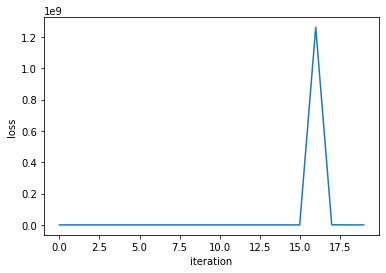

In [13]:
pl.plot(np.array(history64.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration')

In [14]:
output_image64 = model_digits64.predict(x_test)

In [15]:
def compareinout(i, outim, testimg, initialshape=(28,28)):
  fig = pl.figure(figsize(10,5))
  ax = fig.add_subplot(121) 
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(122) 
  ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

Comparo i risultati che ottengo ricostruendo l'immagine

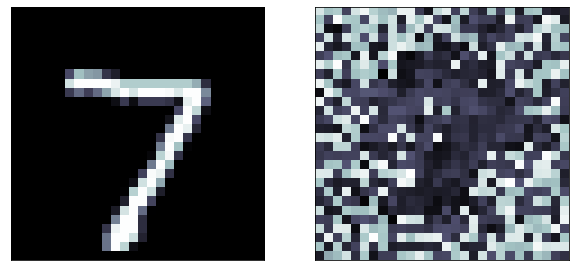

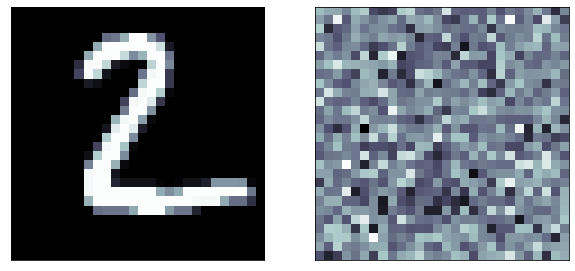

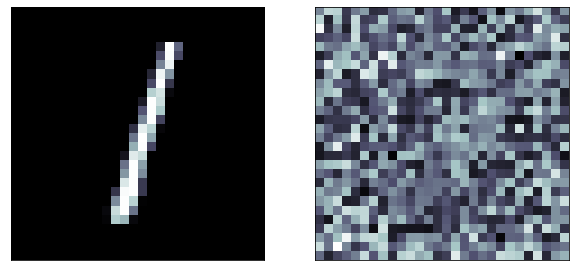

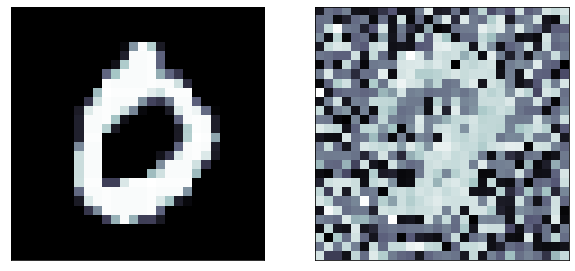

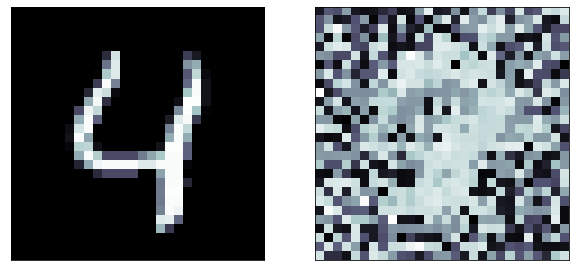

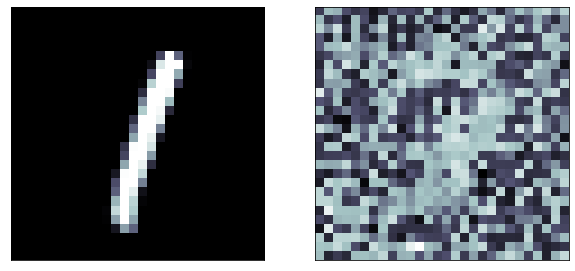

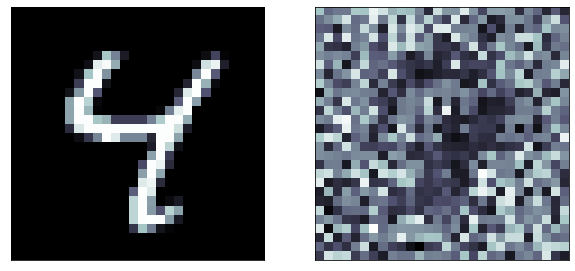

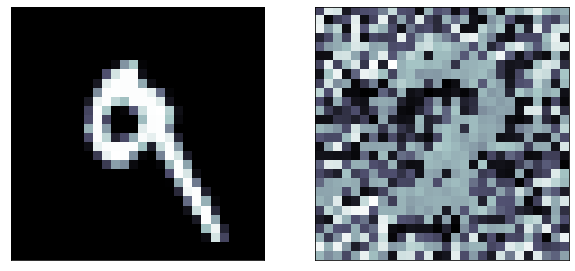

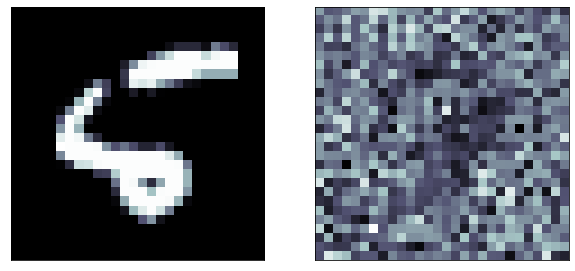

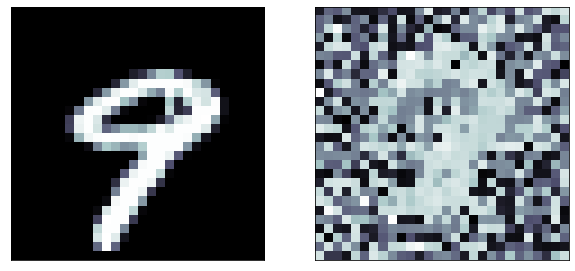

In [16]:
for i in range(10):
  compareinout(i, output_image64, x_test)

This is a rather bad result. Let me see if I can improve it . The images are too detailed. I can treat the problem as a binary problem to derice some detail. To approach a binary classifier I switch the activation function in the last layer to sigmoid. 

#change loss function

In [30]:
#choose the optimizer and loss appropriately!
model_digits64_sig = Sequential()
## encoder.....
model_digits64.add(Dense(units= 128, activation='linear', input_shape=(784,)))
  #compression layer
model_digits64.add(Dense(units= 64, activation='linear'))
## deencoder
#decompression layer, same size as in the encoder
model_digits64.add(Dense(units= 128, activation='linear'))
#output layer, same size as input
model_digits64.add(Dense(ndim, activation='sigmoid'))
                             

model_digits64_sig.compile(optimizer="adam", loss='binary_crossentropy', )
model_digits64_sig.compile(optimizer = keras.optimizers.Adam(lr=0.5), loss='binary_crossentropy')

In [31]:
#model_digits64_sig = Sequential()

#model_digits64_sig.add(Dense(ndim, activation='sigmoid'))
#model_digits64_sig.compile(optimizer="adadelta", loss='binary_cross_entry')

In [32]:
history64_sig = model_digits64_sig.fit(x_train, x_train, 
                                       validation_data=(x_test, x_test), 
                                       epochs=20, batch_size=100, verbose=1)

Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0583 - val_loss: 0.0581
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0584 - val_loss: 0.0581
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0583 - val_loss: 0.0581
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0584 - val_loss: 0.0581
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0584 - val_loss: 0.0581
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0584 - val_loss: 0.0581
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0584 - val_loss: 0.0581
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0581 - val_loss: 0.0581
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0583 - val_loss: 0.0581
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.0585 - val_loss: 0.0581

Text(0.5, 0, 'iteration')

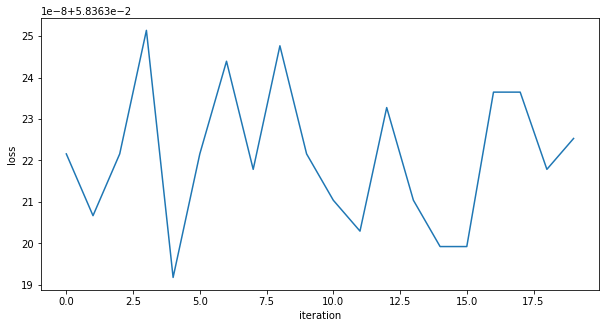

In [33]:
pl.plot(np.array(history64_sig.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration')
#pl.yscale('log')
#pl.xscale('log')